acquire images


In [ ]:
from bing_image_downloader import downloader

In [ ]:
downloader.download("dwayne johnson",limit = 100, output_dir = "/content/donnie", adult_filter_off=True, filter = "photo")

In [ ]:
downloader.download("ariana grande face",limit = 100, output_dir = "/content/ariana", adult_filter_off=True, filter = "photo")

In [ ]:
downloader.download("cristiano ronaldo face",limit = 100, output_dir = "/content/ronaldo", adult_filter_off=True, filter = "photo")

import libraries

In [1]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

store the names of images in a list

In [2]:
rock = os.listdir("/content/rock")

In [3]:
ariana = os.listdir("/content/grand")

In [4]:
ronaldo = os.listdir("/content/ronaldo")

In [5]:
hideo = os.listdir("/content/kojima")

Read images

In [6]:
limit = len(ronaldo)
ronaldo_images = [None] * limit
j = 0
for i in ronaldo:
    if (j<limit):
        ronaldo_images[j] = imread("/content/ronaldo/"+i)
        j+=1
    else:
        break

In [7]:
limit = len(ariana)
ariana_images = [None] * limit
j = 0
for i in ariana:
    if (j<limit):
        ariana_images[j] = imread("/content/grand/"+i)
        j+=1
    else:
        break

In [8]:
limit = len(rock)
rock_images = [None] * limit
j = 0
for i in rock:
    if (j<limit):
        rock_images[j] = imread("/content/rock/"+i)
        j+=1
    else:
        break

In [9]:
limit = len(hideo)
hideo_images = [None] * limit
j = 0
for i in hideo:
    if (j<limit):
        hideo_images[j] = imread("/content/kojima/"+i)
        j+=1
    else:
        break

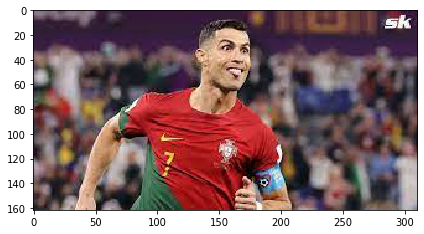

In [10]:
imshow(ronaldo_images[44])

Convert to grayscale

In [11]:
limit_d = len(rock)
rock_gray = [None] * limit_d
j = 0
for i in rock:
    if (j<limit_d):
        rock_gray[j] = rgb2gray(rock_images[j])
        j+=1
    else:
        break

In [12]:
limit_r = len(ronaldo)
ronaldo_gray = [None] * limit_r
j = 0
for i in ronaldo:
    if (j<limit_r):
        ronaldo_gray[j] = rgb2gray(ronaldo_images[j])
        j+=1
    else:
        break

In [13]:
limit_a = len(ariana)
ariana_gray = [None] * limit_a
j = 0
for i in ariana:
    if (j<limit_a):
        ariana_gray[j] = rgb2gray(ariana_images[j])
        j+=1
    else:
        break

In [14]:
limit_h = len(hideo)
hideo_gray = [None] * limit_h
j = 0
for i in hideo:
    if (j<limit_a):
        hideo_gray[j] = rgb2gray(hideo_images[j])
        j+=1
    else:
        break

resize all images to fixed size

In [15]:
for j in range(limit_d):
    rock =  rock_gray[j]
    rock_gray[j]=resize(rock, (512,512))

In [16]:
for j in range(limit_r):
    ronaldo =  ronaldo_gray[j]
    ronaldo_gray[j]=resize(ronaldo, (512,512))

In [17]:
for j in range(limit_a):
    ariana =  ariana_gray[j]
    ariana_gray[j]=resize(ariana, (512,512))

In [18]:
for j in range(limit_h):
    hideo =  hideo_gray[j]
    hideo_gray[j]=resize(hideo, (512,512))

In [19]:
img_length_r = len(ronaldo_gray)
img_length_r

80

In [20]:
img_length_a = len(ariana_gray)
img_length_a

70

In [21]:

img_length_d = len(rock_gray)
img_length_d

79

In [22]:
img_length_h = len(hideo_gray)
img_length_h

49

In [23]:
img_size = hideo_gray[5].shape
img_size

(512, 512)

flatten image

In [24]:
flatten_size = img_size[0] * img_size[1]
flatten_size

262144

In [25]:
for i in range(img_length_d):
  rock_gray[i] = np.ndarray.flatten(rock_gray[i]).reshape(flatten_size,1)

In [26]:
for i in range(img_length_a):
  ariana_gray[i] = np.ndarray.flatten(ariana_gray[i]).reshape(flatten_size,1)

In [27]:
for i in range(img_length_r):
  ronaldo_gray[i] = np.ndarray.flatten(ronaldo_gray[i]).reshape(flatten_size,1)

In [28]:
for i in range(img_length_h):
  hideo_gray[i] = np.ndarray.flatten(hideo_gray[i]).reshape(flatten_size,1)

stack individual values

In [29]:
rock_gray = np.dstack(rock_gray)

In [30]:
ariana_gray = np.dstack(ariana_gray)

In [31]:
ronaldo_gray = np.dstack(ronaldo_gray)

In [32]:
hideo_gray = np.dstack(hideo_gray)

In [33]:
rock_gray.shape

(262144, 1, 79)

rollaxis on the dimensions of images

In [34]:
rock_gray = np.rollaxis(rock_gray, axis = 2,start = 0)

In [35]:
ariana_gray = np.rollaxis(ariana_gray, axis = 2,start = 0)

In [36]:
ronaldo_gray = np.rollaxis(ronaldo_gray, axis = 2,start = 0)

In [37]:
hideo_gray = np.rollaxis(hideo_gray, axis = 2,start = 0)

In [38]:
hideo_gray.shape

(49, 262144, 1)

reshape

In [39]:
rock_gray = rock_gray.reshape(img_length_d, flatten_size)
rock_gray.shape

(79, 262144)

In [40]:
ariana_gray = ariana_gray.reshape(img_length_a, flatten_size)
ariana_gray.shape

(70, 262144)

In [41]:
ronaldo_gray = ronaldo_gray.reshape(img_length_r, flatten_size)
ronaldo_gray.shape

(80, 262144)

In [42]:
hideo_gray = hideo_gray.reshape(img_length_h, flatten_size)
hideo_gray.shape

(49, 262144)

convert to dataframe

In [43]:
rock_df = pd.DataFrame(rock_gray)
rock_df.head()

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.783298,0.795809,0.839307,0.874686,0.900658,0.895228,0.884053,0.867286,0.859815,0.854400,...,0.694248,0.694092,0.694005,0.693182,0.691263,0.688217,0.687464,0.687354,0.687243,0.687211
1,0.569454,0.569454,0.569454,0.569454,0.570982,0.572629,0.574275,0.575922,0.577569,0.579216,...,0.312754,0.301226,0.295397,0.290694,0.290321,0.295166,0.300356,0.309982,0.319607,0.315936
2,0.867431,0.867331,0.867487,0.867643,0.867972,0.868448,0.868923,0.868970,0.868970,0.868773,...,0.860484,0.860144,0.861554,0.863700,0.872627,0.881554,0.886385,0.886385,0.886385,0.886385
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.084244,0.078974,0.060653,0.044749,0.031626,0.027779,0.025492,0.024723,0.024293,0.023602,...,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059


In [44]:
ariana_df = pd.DataFrame(ariana_gray)
ariana_df.head()

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.596644,0.596644,0.596644,0.596644,0.596644,0.596644,0.596644,0.597582,0.599014,0.600447,...,0.004224,0.005472,0.006719,0.007536,0.007536,0.007536,0.006920,0.005905,0.004890,0.005639
1,0.817658,0.817658,0.817658,0.817658,0.817658,0.817658,0.817658,0.817658,0.817658,0.817658,...,0.852007,0.852007,0.852007,0.852007,0.852007,0.852007,0.853367,0.854634,0.854634,0.854634
2,0.416369,0.416438,0.419419,0.422477,0.425602,0.430310,0.436272,0.442422,0.448707,0.454180,...,0.576561,0.575535,0.575535,0.575415,0.575129,0.574092,0.572109,0.571048,0.571048,0.571048
3,0.359087,0.359087,0.359087,0.359087,0.359087,0.359087,0.359087,0.359087,0.359087,0.359087,...,0.091988,0.091988,0.091988,0.091988,0.091988,0.091988,0.091988,0.091988,0.091988,0.091988
4,0.884266,0.882688,0.871273,0.887630,0.915481,0.931060,0.944397,0.917902,0.893335,0.887445,...,0.159226,0.157119,0.156863,0.156874,0.157551,0.158123,0.158123,0.158123,0.158123,0.158123


In [45]:
hideo_df = pd.DataFrame(hideo_gray)
hideo_df["label"] = "Hideo Kojima"

In [46]:
ronaldo_df = pd.DataFrame(ronaldo_gray)
ronaldo_df["label"] = "Cristiano Ronaldo"
ronaldo_df.head()

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,...,0.643207,0.643207,0.644816,0.648655,0.650798,0.650798,0.650798,0.650798,0.650798,Cristiano Ronaldo
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cristiano Ronaldo
2,0.336791,0.337017,0.337789,0.337835,0.338191,0.339717,0.340759,0.341365,0.342725,0.344141,...,0.420188,0.416879,0.398497,0.385553,0.378659,0.370596,0.362222,0.354557,0.352308,Cristiano Ronaldo
3,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,...,0.857417,0.857003,0.854705,0.853495,0.853495,0.853495,0.853495,0.853495,0.853495,Cristiano Ronaldo
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.841052,0.813634,0.774784,0.690654,0.606524,0.544412,0.502547,0.460682,0.489177,Cristiano Ronaldo


In [47]:
rock_df["label"] = "Dwayne Johnson"
ariana_df["label"] = "Ariana Grande"

In [48]:
df_1 = pd.concat([rock_df, ariana_df])
df = pd.concat([
    df_1, hideo_df])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.783298,0.795809,0.839307,0.874686,0.900658,0.895228,0.884053,0.867286,0.859815,0.854400,...,0.694092,0.694005,0.693182,0.691263,0.688217,0.687464,0.687354,0.687243,0.687211,Dwayne Johnson
1,0.569454,0.569454,0.569454,0.569454,0.570982,0.572629,0.574275,0.575922,0.577569,0.579216,...,0.301226,0.295397,0.290694,0.290321,0.295166,0.300356,0.309982,0.319607,0.315936,Dwayne Johnson
2,0.867431,0.867331,0.867487,0.867643,0.867972,0.868448,0.868923,0.868970,0.868970,0.868773,...,0.860144,0.861554,0.863700,0.872627,0.881554,0.886385,0.886385,0.886385,0.886385,Dwayne Johnson
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Dwayne Johnson
4,0.084244,0.078974,0.060653,0.044749,0.031626,0.027779,0.025492,0.024723,0.024293,0.023602,...,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,Dwayne Johnson


In [49]:
from sklearn.utils import shuffle

In [50]:
df_index = shuffle(df).reset_index()

In [51]:
df_index.head()

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,24,0.163687,0.163687,0.163687,0.163687,0.163687,0.163687,0.163687,0.163687,0.163687,...,0.120535,0.120535,0.120535,0.120535,0.120535,0.120535,0.120535,0.120535,0.120535,Hideo Kojima
1,5,0.791628,0.791628,0.791628,0.793145,0.795259,0.795550,0.795565,0.797679,0.799471,...,0.807768,0.823993,0.841979,0.837238,0.831946,0.824246,0.816738,0.809717,0.808699,Ariana Grande
2,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Dwayne Johnson
3,53,0.480049,0.481047,0.484448,0.486812,0.487989,0.485487,0.478251,0.466763,0.450254,...,0.300688,0.298953,0.292832,0.288520,0.286222,0.283925,0.281627,0.279329,0.278655,Dwayne Johnson
4,9,0.923242,0.923242,0.923242,0.923242,0.923242,0.923242,0.923242,0.923242,0.923242,...,0.502364,0.501626,0.501104,0.502587,0.504070,0.504873,0.504873,0.504873,0.504873,Ariana Grande


In [52]:
df_index.drop(columns = ["index"],axis = 1,inplace=True)

In [53]:
x = df_index.values[:,:-1]

In [54]:
y = df_index.values[:,-1]

train test split of dataset

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [56]:
from sklearn import svm

In [57]:
model = svm.SVC()

build svm model using training dataset

In [58]:
model.fit(x_train, y_train)

SVC()

prediction

In [59]:
y_pred = model.predict(x_test)

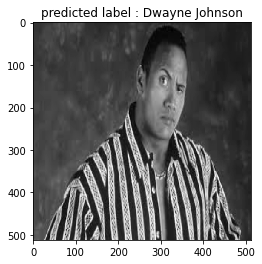

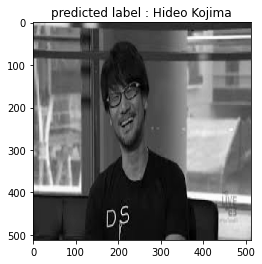

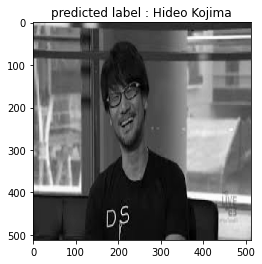

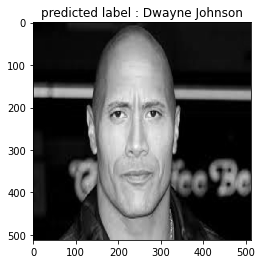

In [60]:
for i in (np.random.randint(0,6,4)):
  predicted_images = (np.reshape(x_test[i], (512,512)).astype(np.float64))
  plt.title("predicted label : {}".format(y_pred[i]))
  plt.imshow(predicted_images, interpolation="nearest", cmap = "gray")
  plt.show()

evaluation metrics i) accuracy

In [61]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.7

evaluation metrics ii) Confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 4,  3,  0],
       [ 3, 12,  2],
       [ 1,  0,  5]])